In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')




Folium installed
Libraries imported.


In [2]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.cluster import KMeans


In [3]:
#!conda install -c districtdatalabs yellowbrick --yes
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
CLIENT_ID = 'O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG' # your Foursquare ID
CLIENT_SECRET = 'C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100


latitude=40.0995305
longitude=-83.0919893

In [5]:
search_query = 'Indian'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

Indian .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG&client_secret=C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ&ll=40.0995305,-83.0919893&v=20180604&query=Indian&radius=1000&limit=100'

In [6]:
import requests
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)



<h2><b>Data Wrangling</b></h2>

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()
dataframe_filtered.shape


(6, 15)

In [8]:
search_query = 'Restaurant'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


Restaurant .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG&client_secret=C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ&ll=40.0995305,-83.0919893&v=20180604&query=Restaurant&radius=1000&limit=100'

In [9]:
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues_all_rest = results['response']['venues']

# tranform venues into a dataframe
dataframe_all_rest = json_normalize(venues_all_rest)
dataframe_all_rest.head()




,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4b69f09cf964a52048bd2be3,Ba Sho Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1572874330,False,2800 Festival Ln,at Sawmill Rd.,40.093434,-83.090655,"[{'label': 'display', 'lat': 40.09343371645922...",...,OH,United States,"[2800 Festival Ln (at Sawmill Rd.), Dublin, OH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4f3293a519836c91c7e55462,Tumbleweed Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1572874330,False,6505 Dublin Center Dr,NaN,40.099801,-83.094334,"[{'label': 'display', 'lat': 40.099801, 'lng':...",...,OH,United States,"[6505 Dublin Center Dr, Dublin, OH 43017, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bbefdb5b083a5936bb6a2e9,Bob Evans Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1572874330,False,3830 Tuller Rd,Sawmill Rd,40.106975,-83.092105,"[{'label': 'display', 'lat': 40.10697495984826...",...,OH,United States,"[3830 Tuller Rd (Sawmill Rd), Dublin, OH 43017...",487766,https://www.grubhub.com/restaurant/bob-evans-3...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,4f32722619836c91c7d8959a,Maharaja Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1572874330,False,6665 Dublin Center Dr,NaN,40.102362,-83.094097,"[{'label': 'display', 'lat': 40.102362, 'lng':...",...,OH,United States,"[6665 Dublin Center Dr, Dublin, OH 43017, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57f04e1b498ed51bff25b6db,Fortune Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1572874330,False,NaN,NaN,40.094070,-83.087317,"[{'label': 'display', 'lat': 40.09406954040128...",...,OH,United States,"[Columbus, OH 43235, United States]",1155831,https://www.grubhub.com/restaurant/fortune-chi...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN


In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_all_rest.columns if col.startswith('location.')] + ['id']
dataframe_all_rest_filtered = dataframe_all_rest.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_all_rest_filtered['categories'] = dataframe_all_rest_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_all_rest_filtered.columns = [column.split('.')[-1] for column in dataframe_all_rest_filtered.columns]
dataframe_all_rest_filtered
dataframe_all_rest_filtered.shape


(10, 15)

In [11]:
dataframe_filtered.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the new Restaurant

# add a red circle marker to represent the new Restaurant
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers

for lat, lng, label in zip(dataframe_all_rest_filtered.lat, dataframe_all_rest_filtered.lng, dataframe_all_rest_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

In [12]:
# Perform sam analysis for New Albany Suburb

latitude=40.0609175
longitude=-82.86072997
search_query = 'Indian'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
search_query = 'Restaurant'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues_all_rest = results['response']['venues']

# tranform venues into a dataframe
dataframe_all_rest = json_normalize(venues_all_rest)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_all_rest.columns if col.startswith('location.')] + ['id']
dataframe_all_rest_filtered = dataframe_all_rest.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_all_rest_filtered['categories'] = dataframe_all_rest_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_all_rest_filtered.columns = [column.split('.')[-1] for column in dataframe_all_rest_filtered.columns]
dataframe_filtered.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the new Restaurant

# add a red circle marker to represent the new Restaurant
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_all_rest_filtered.lat, dataframe_all_rest_filtered.lng, dataframe_all_rest_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    

# display map
venues_map

Indian .... OK!
Restaurant .... OK!


<b>Getting the published json data from the website and using that json to write the data into a dataframe dublin_df, subsequently doing the same for NA_df to get all the json data into their respective dataframes. Then, merge the two datafranes with .merge().</b>

In [13]:
# Create URL to JSON file (alternatively this can be a filepath)
# data for Dublin got from http://worldpopulationreview.com/us-cities/dublin-oh-population/
# data for New Albany got from http://worldpopulationreview.com/us-cities/new-albany-oh-population/

url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/Dublin%20Demo%20data.json'

# Load the first sheet of the JSON file into a data frame
dublin_df = pd.read_json(url, orient='split')

# View the first ten rows
dublin_df.drop(['Bachelors','High School'], axis=1, inplace =True)
dublin_df.columns = ['Race','Dublin Population']


# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/New%20Albany%20Demo.json'

# Load the first sheet of the JSON file into a data frame
NA_df = pd.read_json(url, orient='split')

# View the first ten rows
NA_df.drop(['Bachelors','High School'], axis=1, inplace =True)
NA_df.columns = ['Race','New Albany Population']

merge_df = pd.merge(dublin_df, NA_df, how='inner', on='Race')
merge_df

,Race,Dublin Population,New Albany Population
0,White,21967,5142
1,Asian,5216,489
2,Hispanic,814,51
3,Black,603,534
4,Multiple Races,434,57
5,Other Race,164,36
6,Native American,46,9


<b>Now fetching the json average household income data for both the locations from the website and 
creating dataframes accordingly and merging the resulting dataframes</b>

In [14]:
# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/Dublin%20Income.json'

# Load the first sheet of the JSON file into a data frame
dublinincome_df = pd.read_json(url, orient='split')
dublinincome_df

dublinincome_df.drop(['Female','Male'], axis=1, inplace =True)
dublinincome_df.columns = ['Name','Average Income Per Household-Dublin']
dublinincome_df

,Name,Average Income Per Household-Dublin
0,Overall,74350
1,Less Than High School,47807
2,High School Grad,42335
3,Some College,43263
4,Bachelors Degree,72718
5,Graduate Degree,102136


In [15]:
url='https://raw.githubusercontent.com/seethaparamesh/github-example/master/New%20Albany%20Income.json'

# Load the first sheet of the JSON file into a data frame
NAincome_df = pd.read_json(url, orient='split')



NAincome_df.drop(['Female','Male'], axis=1, inplace =True)
NAincome_df.columns = ['Name', 'Average Income Per Household-New Albany']
NAincome_df



,Name,Average Income Per Household-New Albany
0,Overall,100080
1,Less Than High School,0
2,High School Grad,31125
3,Some College,55192
4,Bachelors Degree,98397
5,Graduate Degree,132578


In [16]:
merge1_df = pd.merge(dublinincome_df,NAincome_df,how='inner',on='Name')
merge1_df

,Name,Average Income Per Household-Dublin,Average Income Per Household-New Albany
0,Overall,74350,100080
1,Less Than High School,47807,0
2,High School Grad,42335,31125
3,Some College,43263,55192
4,Bachelors Degree,72718,98397
5,Graduate Degree,102136,132578


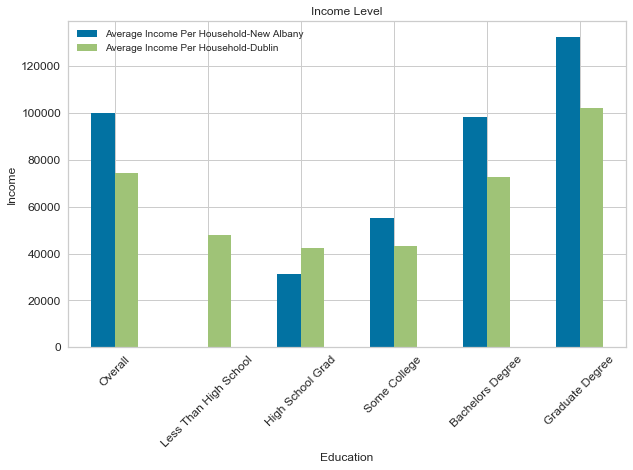

In [17]:
import matplotlib.pyplot as plt
ax = merge1_df[['Average Income Per Household-New Albany','Average Income Per Household-Dublin']].plot(kind='bar', title ="Income Level", figsize=(10, 6), legend=True, fontsize=12)
ax.set_xlabel("Education", fontsize=12)
ax.set_ylabel("Income", fontsize=12)
ax.set_xticklabels(merge1_df.Name, rotation=45)
plt.show()

In [18]:
# validate that analysis of data got from worldpopulationreview.com/us-cities/new-albany-oh-population/ matches a secondary source.
# US Census data got from https://www.census.gov/quickfacts/fact/csv/newalbanycityohio,dublincityohio/PST045218

data=pd.read_csv('https://raw.githubusercontent.com/seethaparamesh/github-example/master/NewAlbany-Dublin.Census.Data.csv')
data

,Fact,"New Albany city, Ohio","Dublin city, Ohio"
0,"Population estimates, July 1, 2018, (V2018)","10,889","48,647"
1,"Population estimates base, April 1, 2010, (V2...","7,867","41,364"
2,"Population, percent change - April 1, 2010 (es...",38.40%,17.60%
3,"Population, Census, April 1, 2010","7,724","41,751"
4,"Total retail sales per capita, 2012","$74,083","$23,251"
5,"Mean travel time to work (minutes), workers ag...",20.7,24.3
6,"Median household income (in 2017 dollars), 201...","$187,200","$128,916"
7,Per capita income in past 12 months (in 2017 d...,"$76,811","$58,386"


<h3><u>Analysis</u></h3>
Based on Census data
<ul>
    <li>Population of New Albany is growing at 38.4% in the past 8 years as compared to only 17.6% for Dublin.</li>
    <li>Average medium income from Census data also match the previous analysis that New Albany is more affluent for high earners.</li>
    <li>Per Capita of retail sales also show that Consumer Expenditure is significanly higher in New Albany as compared to Dublin.</li>
</ul>
    

In [59]:
#http://zipatlas.com/us/zip-code-comparison/percentage-indian-population.htm
TopIndianPopulationZIP=pd.read_csv('https://raw.githubusercontent.com/seethaparamesh/github-example/master/TopIndianPopulationZIP.csv',dtype={'Zip': object})

print(TopIndianPopulationZIP.to_string())

       Zip  Population                City State
0    19437         714      Gwynedd Valley    PA
1    18087         716         Trexlertown    PA
2    41503         732    South Williamson    KY
3    11765         732           Mill Neck    NY
4    06103         761            Hartford    CT
5    07878         774         Mount Tabor    NJ
6    30545         783               Helen    GA
7    93606         788               Biola    CA
8    95303         798             Ballico    CA
9    21737         828             Glenelg    MD
10   41527         872        Forest Hills    KY
11   10005         884            New York    NY
12   99125         887            Endicott    WA
13   60512         892             Bristol    IL
14   50323         957           Urbandale    IA
15   08887         994       Three Bridges    NJ
16   92091        1061     Rancho Santa Fe    CA
17   02163        1191              Boston    MA
18   43240        1193            Columbus    OH
19   10546        12

In [75]:
search_query = 'Indian'
radius = 5000
LIMIT = 50
#CLIENT_ID = 'O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG' # your Foursquare ID
#CLIENT_SECRET = 'C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ' # your Foursquare Secret
CLIENT_ID = 'BXGEC3BIWKC3BSWBFWJAKJSYEW3PBQTVHLP1YEDUHYOKXX4V' # your Foursquare ID
CLIENT_SECRET = 'BVVETWUEWH550QRDL5UUZEZQIJP5KXBQR5XRWP1VJKNOVNXR' # your Foursquare Secret
for i, row in TopIndianPopulationZIP.iterrows():
    zipcode = row[0]
    state = row[3]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v=20180604&query={}&radius={}&limit={}&near={}&near={}'.format(CLIENT_ID, CLIENT_SECRET, search_query, radius, LIMIT,zipcode,state)
    #print(url)
    results = requests.get(url).json()
    try:
        venues = results['response']['venues']
        dataframe = json_normalize(venues)
        NumOfIndianRestuarant = len(dataframe.index)
        TopIndianPopulationZIP.at[i,'NumOfIndianRestuarant'] = NumOfIndianRestuarant
    except KeyError:
        TopIndianPopulationZIP.at[i,'NumOfIndianRestuarant'] = 1
    

In [76]:
print(TopIndianPopulationZIP.to_string())

       Zip  Population                City State  NumOfIndianRestuarant
0    19437         714      Gwynedd Valley    PA                    8.0
1    18087         716         Trexlertown    PA                    1.0
2    41503         732    South Williamson    KY                    0.0
3    11765         732           Mill Neck    NY                   50.0
4    06103         761            Hartford    CT                    0.0
5    07878         774         Mount Tabor    NJ                   12.0
6    30545         783               Helen    GA                    2.0
7    93606         788               Biola    CA                    0.0
8    95303         798             Ballico    CA                    0.0
9    21737         828             Glenelg    MD                    0.0
10   41527         872        Forest Hills    KY                    0.0
11   10005         884            New York    NY                   50.0
12   99125         887            Endicott    WA                

In [84]:
# Data cleanup
invalidData = [0, 1, 2, 50]
TopIndianPopulationZIPNotFiltered = TopIndianPopulationZIP[~TopIndianPopulationZIP.NumOfIndianRestuarant.isin(invalidData)]



In [91]:

print(TopIndianPopulationZIPNotFiltered.to_string())

       Zip  Population                City State  NumOfIndianRestuarant
0    19437         714      Gwynedd Valley    PA                    8.0
5    07878         774         Mount Tabor    NJ                   12.0
14   50323         957           Urbandale    IA                    3.0
23   75251        1331              Dallas    TX                    7.0
24   22027        1377         Dunn Loring    VA                    9.0
28   30346        1452             Atlanta    GA                   11.0
33   19453        1608          Mont Clare    PA                    4.0
37   20759        1684              Fulton    MD                   30.0
38   94304        1704           Palo Alto    CA                    4.0
48   20818        1987          Cabin John    MD                    4.0
53   73128        2137       Oklahoma City    OK                    8.0
58   52401        2392        Cedar Rapids    IA                    3.0
61   20763        2438              Savage    MD                

In [86]:
X_b = TopIndianPopulationZIPNotFiltered.drop(['NumOfIndianRestuarant','City','State','Zip'], axis=1)
y_b = TopIndianPopulationZIPNotFiltered['NumOfIndianRestuarant']
X_b

,Population
0,714
5,774
14,957
23,1331
24,1377
...,...
342,13022
343,13032
344,13038
345,13109


In [87]:
y_b

0       8.0
5      12.0
14      3.0
23      7.0
24      9.0
       ... 
342     5.0
343     5.0
344    15.0
345     7.0
347     8.0
Name: NumOfIndianRestuarant, Length: 99, dtype: float64

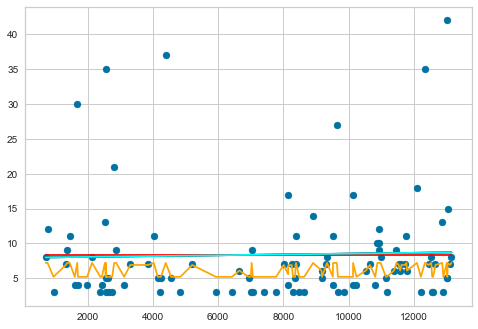

In [88]:

plt.scatter( pd.to_numeric(TopIndianPopulationZIPNotFiltered["Population"]), pd.to_numeric(TopIndianPopulationZIPNotFiltered['NumOfIndianRestuarant']))
i=0

model_linear_model = linear_model.Lasso(alpha=0.1)
model_linear_model.fit(X_b, y_b)  
plt.plot(X_b, model_linear_model.predict(X_b), c='blue', label='Linear model')

model_LinearRegression = linear_model.LinearRegression()
model_LinearRegression.fit(X_b, y_b)  
plt.plot(X_b, model_LinearRegression.predict(X_b), c='green', label='LinearRegression')

model_ElasticNetCV = ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,l1_ratio=0.5, 
        max_iter=1000, n_alphas=100, n_jobs=None,normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
model_ElasticNetCV.fit(X_b, y_b)  
plt.plot(X_b, model_ElasticNetCV.predict(X_b), c='red', label='ElasticNetCV')

model_rbf = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model_rbf.fit(X_b, y_b)  
plt.plot(X_b, model_rbf.predict(X_b), c='orange', label='SVRrbf')

model_Ridge = linear_model.Ridge(alpha=.5)
model_Ridge.fit(X_b, y_b)  
plt.plot(X_b, model_Ridge.predict(X_b), c='cyan', label='SVRlinear')


In [89]:
dublinPOP = [5216];
x = np.reshape(dublinPOP,(len(dublinPOP), 1))
print("model_linear_model : ",model_linear_model.predict(x)[0])
print("model_LinearRegression : ",model_LinearRegression.predict(x)[0])
print("model_rbf : ",model_rbf.predict(x)[0])
print("model_Ridge : ",model_Ridge.predict(x)[0])


model_linear_model :  8.247207666095603
model_LinearRegression :  8.247191570198762
model_rbf :  6.1952380952380945
model_Ridge :  8.247191570246068


In [90]:
NA_POP = [489];
x = np.reshape(NA_POP,(len(NA_POP), 1))
print("model_linear_model : ",model_linear_model.predict(x)[0])
print("model_LinearRegression : ",model_LinearRegression.predict(x)[0])
print("model_rbf : ",model_rbf.predict(x)[0])
print("model_Ridge : ",model_Ridge.predict(x)[0])


model_linear_model :  7.972158850647531
model_LinearRegression :  7.972112582971042
model_rbf :  6.1952380952380945
model_Ridge :  7.972112583107026
